# Introduction to jupyter/ipython notebooks

## General remarks

Modalities for programming excercises: The programming excercises will be uploaded to the excercise system as jupyter notebooks. You can download and modify them. When you are done send them to martin.gaerttner@kip.uni-heidelberg.de as a *.ipynb file.

Why jupyter/ipython notebooks?

- Python is an interpreted language (not compiled!) and the programs you write can thus be executed on any platform without compiling before. This comes at the expense of speed, but this is not critical for most of the things we will be doing.  
- Jupyter notebooks use the concept of literate programming, which is becoming very popular for education and research. It means that one writes script blocks interspereced with formatted text, creating a nice and easily readable "notebook".
- We can execute different parts of the script without re-running the whole program every time. Good for playing around and testing.
- There are plenty of tools for visulaization of numerical data.
- It's free!
- There are plenty of open source libraries (you will get to know some of them soon).
- Everything is very well documentated and heaps of tutorials and examples can be found - check it out:  
https://docs.python.org/2/library/index.html  
https://jupyter-notebook.readthedocs.io/en/latest/

Of course, you can also use python also as a normal script language. Write a program/script and save it as a .py file and then run it in the console either by starting ipython or just go "python program_name.py".

Other languages commonly used for scientific research: 

- Compiled languages: C/C++, Julia, ...
- Matlab, R, ... (commonly used for statistics and data processing applications)
- More high level ("computer algebra system"): Mathematica (strong in symbolic calculations/hybrid symbolic and numerical)

Some survival rules/general good practice advise:

- Think first: Stucture the task. What are inputs and outputs? What variables and data structures are needed? What sub-tasks can be split off? Write pseudocode to get an idea of how the program will be structured.
- Testing: Test every piece you implement with simple examples where you know what the aswer should be.
- Divide and conquer: Start with the simplest subproblem. Implement it and test it. Then include it into more complicated routines.
- Solution by evolution: Everything problem you solve, you will encounter in a different context again at a later point. So reuse you code to save time. Also use what others have written. The internet is full of nice examples. But test it and don't use it if you don't understand what it does.
- Write out error messages, progresss messages, and intermediate resuts in log files for checking.
- Document your code so you will later be able to understand and debug it!
- Use meaningful variable names. Respect conventions for names of constants, variables and functions.
- Make your code better readable by styling: Indentation, spaces...
- Forget about all the above and just play ;-)

## Commonly used libraries

- numpy: Powerful package for scientific computing. We will mainly use it for handling of arrays (vectors and matrices).
- scipy: Library with lots of useful routines for solving differential equation and optimization. We will typically only import the functions we need for a specific task.
- matplotlib: for plotting (usually matplotlib.pyplot is enough)
- h5py: For storing and retrieving numerical data using the hdf5 binary data format. We will need this if we run long simulations and want to save the result and read it again for analysis and visualization.

In [1]:
# load libraries

import numpy as np   # now we can call functions from this library as np.function(...)

from scipy.optimize import curve_fit   # example for importing only one function. 
# Loading too many different libraries can lead to conflicting definitions!

import matplotlib.pyplot as plt   # with this we can make plots

%matplotlib inline
# This sets the backend of matplotlib to the 'inline' backend. 
# Only works in notebooks, not in *.py scripts.

## Introductory example: distribution of prime numbers

This example shows you some basics of how to use arrays, special functions, curve fitting and plotting.

The prime number theorem states that the density of prime numbers among the natural numbers approaches $1/log(N)$ in the large $N$ limit. More formally the prime counting function $\pi(N)$ defined as the number of prime numbers smaller than $N$ apporaches $N/log(N)$. This theorrem was  proved independently by Jacques Hadamard and Charles Jean de la Vallée Poussin in 1896 (see https://en.wikipedia.org/wiki/Prime_number_theorem). We want to check it numerically.

First we define a function that tests whether a number is prime. (There are much more fancy ways of doing this but ok...)

In [2]:
def is_prime(n):
    if n == 2: # 2 is prime
        return True 
    if n%2 == 0 or n < 2: # all other even number are not
        return False
    for i in range(3,int(np.sqrt(n))+1,2): # look for factors. 
        # Since even numbers have been excluded already, we only need to check  for odd factors.
        # We only need to check up to sqrt(n) rounded down to the nearest integer. 
        if n%i == 0:
            return False
    return True

Note that we made use of the library function np.sqrt() form the numpy library.  
A note on the expression int(np.sqrt(n))+1:  
The function np.sqrt() returns a floating point number, which is cast into an integer again by int(), equivalent to rounding down. I added 1 because for squares of primes it might happen that the float returned by np.sqrt() is smaller than sqrt(n) due to finite precision. In this case it would get rounded to sqrt(n)-1 and sqrt(n) would not be checked, and thus the function would incorrectly identify n as prime. That is why I add 1 to be on the safe side.

Next we want to build a list of all prime numbers up to some number $N$. 

In [3]:
N = 2**18

all_primes = np.array([],dtype=np.int) # generate empty array of integer type (default is float)
for n in range(N):
    if is_prime(n):
        all_primes = np.append(all_primes,[n])

# print(all_primes) # This was added for testing puposes, don't run it for too large N...

Here we used numpy's array type. The reason for doing this will become clear below. We could also use the python standard array type. Then it would look like this:

In [4]:
all_primes2 = []
for n in range(N):
    if is_prime(n):
        all_primes2.append(n)

# print(all_primes)

There are good tutorials that explain the different types in python and how to deal with them. You may also want to check out the numpy.array() documantation, which explains things in more detail.

The way we calculated our list of primes is definitely not very efficient.  
Exercise: Write a function that return the list of all primes <=N which makes the factor search more efficient by only checking for prime factors.

Next, we want to count how many primes smaller than a given number $x$ there are, i.e. evaluate $\pi(x)$ for a given list of gridpoints. We want to choose the gridpoints logarithmically spaced anticipating the functional dependence of $\pi(x)$.

In [6]:
# define the prime counting function
def piFct(prime_list,x):
#     if x > np.amax(prime_list):
#         print "Error: the argument is exceeds the largest prime in your list."
#         return
    return np.count_nonzero(prime_list <= x)


# make a logarithmically spaced grid
grid_N = 2**(np.arange(int(np.log2(N)))+1) # This is something we could not do with normal arrays.

piVals = np.zeros_like(grid_N)
for i in range(len(grid_N)):
    piVals[i] = piFct(all_primes,grid_N[i])
    

print(np.transpose([grid_N, piVals]))

[[     2      1]
 [     4      2]
 [     8      4]
 [    16      6]
 [    32     11]
 [    64     18]
 [   128     31]
 [   256     54]
 [   512     97]
 [  1024    172]
 [  2048    309]
 [  4096    564]
 [  8192   1028]
 [ 16384   1900]
 [ 32768   3512]
 [ 65536   6542]
 [131072  12251]
 [262144  23000]]


Here we used the handy properties of numpy arrays: np.count() counts the element of a list which fulfill a certain criterion. np.arange() generates a numpy array of equally spaced numbers. This array can then be exponentiated, meaning that if $x$ in an array the function $2^x$ gets evaluated for all elements of the array and the output is again an array.

We can now go on and plot the values we have calculated using matplotlib.

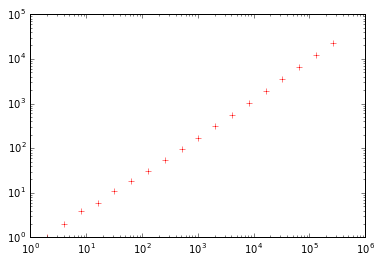

In [7]:
plt.loglog(grid_N,piVals,'r+')

If we want to control some more things about our graphics like plot titles, axis labels etc., we can do the following:

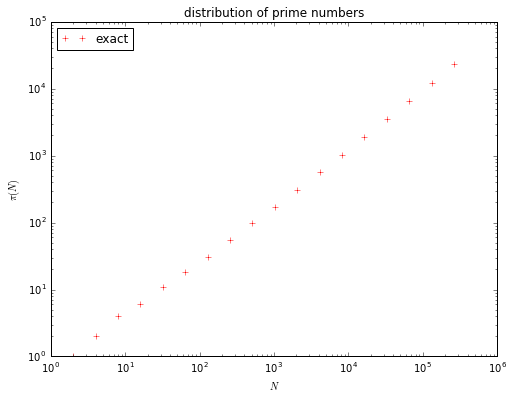

In [8]:
# create a figure
fig = plt.figure(dpi = 80,figsize=(8,6))
# create axes in the figure
ax = fig.add_subplot("111")
# plot the data into the axes
ax.loglog(grid_N,piVals,'r+',label="exact")
# add labels and legends
ax.legend(loc = 'upper left')
ax.set_title("distribution of prime numbers")
ax.set_xlabel("$N$")
ax.set_ylabel("$\pi(N)$")

plt.show()


Now lets compare it to the analytical prediction!

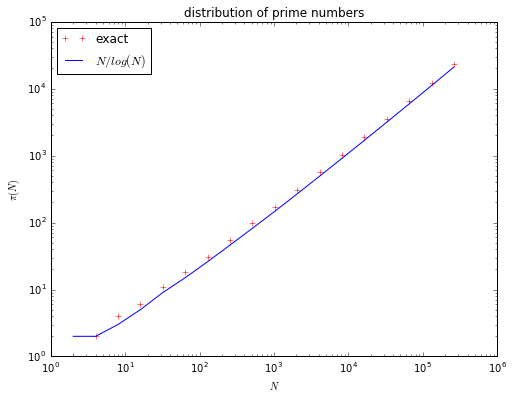

In [10]:
piValsAnalyt = np.zeros_like(grid_N) # another neat feature of numpy arrays: 
# Create an array with same length and type which is initialized with zeros
for i in range(len(grid_N)):
    piValsAnalyt[i] = grid_N[i]/np.log(grid_N[i])

ax.loglog(grid_N,piValsAnalyt,'b',label="$N/log(N)$")
ax.legend(loc = 'upper left')

fig

Now we want to see if a simple power law function would also fit (the curve looks almost linear on the log-log plot...)   
This illustrates the use of the curve_fit() function from scipy.

[ 0.2890577   0.90438721]


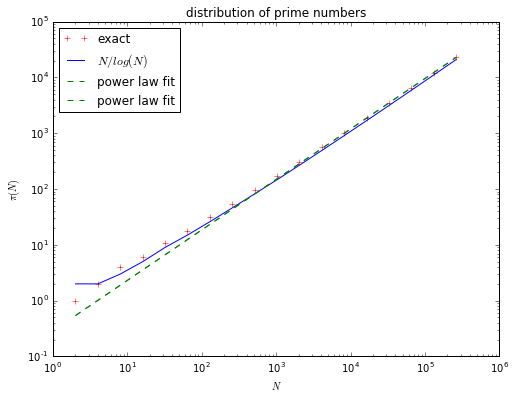

In [12]:
# try fitting a power law
def powerlaw(x, a, b):
    return a*np.power(x,b)

fitfunc = powerlaw
xdata = grid_N
ydata = piVals
params_opt, pcov = curve_fit(fitfunc, xdata, ydata)
print(params_opt)
# print pcov # covariance matrix of the fit (sqrt of diagonal elements  gives fit errors for parameters)

ax.loglog(xdata, fitfunc(xdata, *params_opt), 'g--',label="power law fit")
ax.legend(loc = 'upper left')
fig


The power law seems to fit well at large N but not at small N. What would happen if we calculate $\pi(N)$ for even larger N? How could we determine which curve fits better?
If you want to find out more about the distribution of prime numbers, e.g. whether there are analytical functions that fit even better than $N/log(N)$, check out the wikipedia page about it. Try to evaluate and plot the offset logarithmic integral function and see if it fits better. How does the difference between the approximations and $\pi(N)$ scale with N?

Hopefully, you have learned some of the basic features of jupyter notebooks using python, which allows you to get started with the quantum physics problems we will encounter in the lecture.

Here are some ideas on how you could explore more features:  
- Measure the time your algorithm needs to generate the list of primes, using the time() function from the time package. How can you make you algorithm more efficient?
- If you want to reuse functions you have written in later projects it makes sense to create your own "module" file (e.g. my_useful_functions.py) Then you can simply include them in any notebook you write by  
include my_useful_functions.py as myfcts  
(And it you think those functions could also be useful for others, post them to github :-)  
- If you don't want to recalculate your prime list every time you run this notebook, you could also consider writing it into a file using the hdf5 input output routines mentioned earlier. This is something you will frequently need when doing larger scales numerical simulatations.
- Check out some online tutorials. I found this one useful: https://www.w3schools.com/python/ But there are many more. 